In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arma import ARMA, PureARMA

In [3]:
def simulate_arma(phi=None,theta=None,sigma=1,simulations=100):
    if phi is None:
        phi = []
    if theta is None:
        theta = []
    phi = phi
    theta = [1] + theta
    Z = [np.random.normal(scale=sigma) for k in range(simulations+len(phi)+len(theta))]
    X = []
    for k in range(len(phi)):
        X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)])))
    for k in range(len(phi),simulations+len(phi)):
        X.append(sum(a*b for a,b in zip(theta,Z[k:k+len(theta)]))+sum(a*b for a,b in zip(phi,X[::-1][:len(phi)])))
    return np.array(X[len(phi):])

fitted coeffs: [[  6.01182574e-01]
 [  1.07949036e-01]
 [  1.96742357e-01]
 [ -5.40716492e-04]]
fitted sigma^2: [[ 0.24595331]]


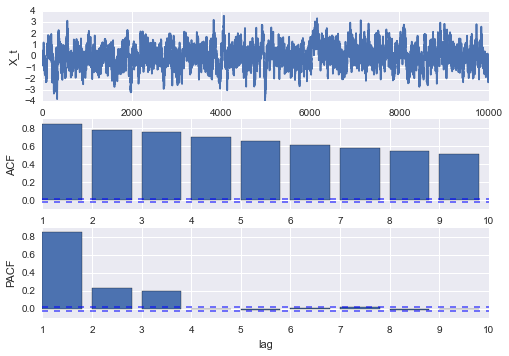

In [3]:
#simulating an AR process and fit an AR model

#select parameters
phi_ar = [0.6,0.1,0.2]
theta_ar = []
ar_order = 4
n_simulations = 10000
acf_print_limit = 10
sigma =  0.5

#simulate AR process
simulated_ar = simulate_arma(phi=phi_ar,theta=theta_ar,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_ar)
plt.ylabel('X_t')

#fit AR model
ar_model = ARMA(simulated_ar)

plt.subplot(3,1,2)
ar_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ar_model.plot_PACF(limit=acf_print_limit)

ar_model.fit_ar(ar_order)

print('fitted coeffs:',ar_model.coefs)
print('fitted sigma^2:',ar_model.sigma)

phi: [array([ 0.64079426]), array([ 0.63657036,  0.00659166]), array([ 0.6353496 , -0.1112996 ,  0.18519754]), array([ 0.63819578, -0.11301009,  0.19496182, -0.01536836])]
nu: [ 0.25171286  0.25170192  0.24306901  0.2430116 ]


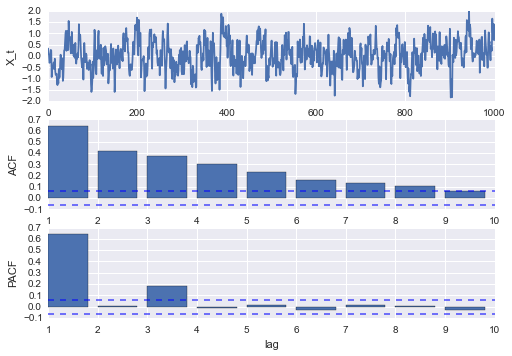

/Users/lrichter/anaconda/envs/Python34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


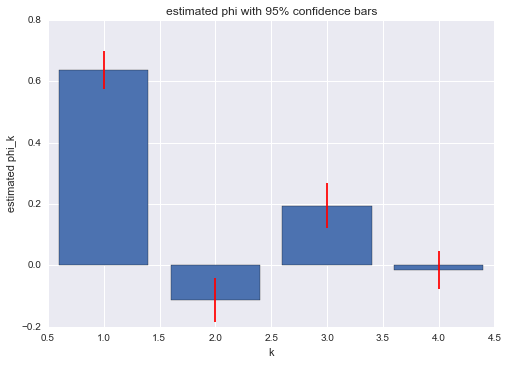

In [4]:
#simulating an AR process and fit an AR model using the durbin levinson algorithm

#select parameters
phi_ar = [0.6,-0.1,0.2]
theta_ar = []
ar_order = 4
n_simulations = 1000
acf_print_limit = 10
sigma =  0.5

#simulate AR process
simulated_ar = simulate_arma(phi=phi_ar,theta=theta_ar,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_ar)
plt.ylabel('X_t')

#fit AR model
ar_model = ARMA(simulated_ar)

plt.subplot(3,1,2)
ar_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ar_model.plot_PACF(limit=acf_print_limit)

ar_model.fit_ar_durbin_levinson(ar_order)

print('phi:',ar_model.phi)
print('nu:',ar_model.nu)

plt.show()

plt.bar(list(range(1,ar_order+1)),ar_model.phi[ar_order-1],align='center',yerr = ar_model.get_confidence_interval_ar_d_l(ar_order),ecolor='red')
plt.xlabel('k')
plt.ylabel('estimated phi_k')
plt.title('estimated phi with 95% confidence bars')
plt.show()

theta: [array([ 0.1152444]), array([ 0.07039154,  0.39730992]), array([ 0.11453245,  0.40524327, -0.02213734])]
nu: [ 5.38643854  5.31489979  4.50982618  4.45181633]


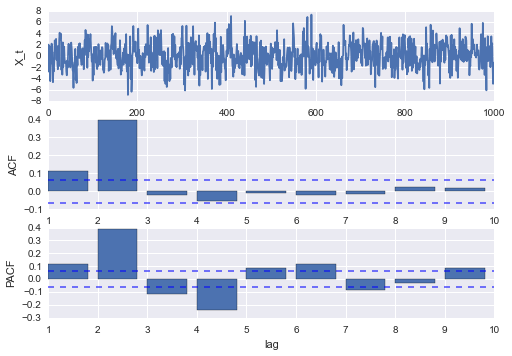

/Users/lrichter/anaconda/envs/Python34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


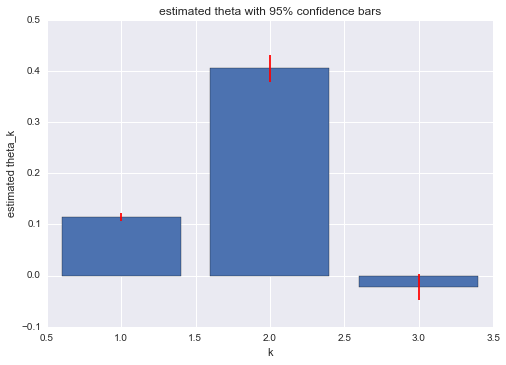

In [5]:
#simulating an MA process and fit an MA model using the durbin levinson algorithm

#select parameters
phi_ma = []
theta_ma = [0.1,0.6]
ma_order = 3
n_simulations = 1000
acf_print_limit = 10
sigma =  2

#simulate MA process
simulated_ma = simulate_arma(phi=phi_ma,theta=theta_ma,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_ma)
plt.ylabel('X_t')

#fit MA model
ma_model = ARMA(simulated_ma)

plt.subplot(3,1,2)
ma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ma_model.plot_PACF(limit=acf_print_limit)

ma_model.fit_ma_durbin_levinson(ma_order)

print('theta:',ma_model.theta_ma)
print('nu:',ma_model.nu_ma)

plt.show()

plt.bar(list(range(1,ma_order+1)),ma_model.theta_ma[ma_order-1],align='center',yerr = ma_model.get_confidence_interval_ma_d_l(ma_order),ecolor='red')
plt.xlabel('k')
plt.ylabel('estimated theta_k')
plt.title('estimated theta with 95% confidence bars')
plt.show()

phi: [[ 0.81907204]
 [ 0.11069063]]
theta: [[[ 0.48518193]]]
sigma^2: 1.0095171296


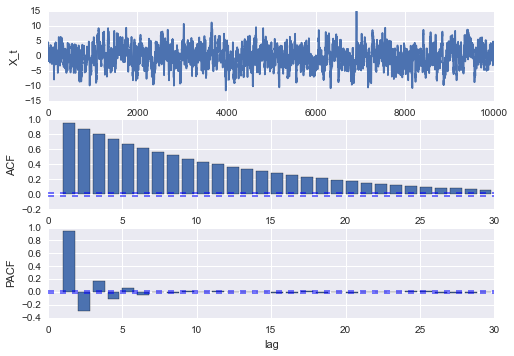

In [6]:
#simulating an ARMA process and fit an ARMA model using the durbin levinson algorithm

#select parameters
phi_arma = [0.7,0.2]
theta_arma = [0.6]
ar_order = 2
ma_order = 1
m = 10
n_simulations = 10000
acf_print_limit = 30
sigma =  1

#simulate ARMA process
simulated_arma = simulate_arma(phi=phi_arma,theta=theta_arma,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_arma)
plt.ylabel('X_t')

#fit ARMA model
arma_model = ARMA(simulated_arma)

plt.subplot(3,1,2)
arma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
arma_model.plot_PACF(limit=acf_print_limit)

arma_model.fit_arma_preliminary(ar_order,ma_order,m)

print('phi:',arma_model.phi)
print('theta:',arma_model.theta)
print('sigma^2:',arma_model.nu_ma[m])

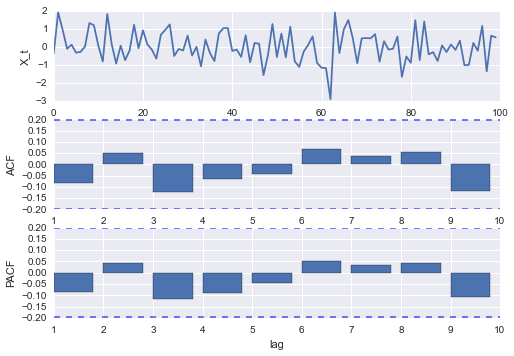

In [7]:
#simulating an MA process and fit an MA model using the innovations algorithm

#select parameters
phi_ma = []
theta_ma = []
ma_order = 1
n_simulations = 100
acf_print_limit = 10
sigma =  1

#simulate MA process
simulated_ma = simulate_arma(phi=phi_ma,theta=theta_ma,simulations=n_simulations,sigma=sigma)

plt.subplot(3,1,1)
plt.plot(simulated_ma)
plt.ylabel('X_t')

#fit MA model
ma_model = ARMA(simulated_ma)

plt.subplot(3,1,2)
ma_model.plot_ACF(limit=acf_print_limit)
plt.subplot(3,1,3)
ma_model.plot_PACF(limit=acf_print_limit)

thetas, nus = ma_model.innovations_algorithm()

In [8]:
simulated_ma = [-2.58,1.62,-0.96,2.62,-1.36]

ma_model = ARMA(simulated_ma)
ma_model.data = ma_model.data + np.mean(simulated_ma)
ma_model.acf = [None] * 100

thetas, nus = ma_model.innovations_algorithm()

In [9]:
nus

array([ 3.78328   ,  2.30782279,  2.30051081,  2.07924274,  1.72925708])

In [12]:
ma_model.sample_autocovariance_function(0)

3.78328

In [ ]:
simulated_ma = [1,]

ma_model = ARMA(simulated_ma)
ma_model.data = ma_model.data + np.mean(simulated_ma)
ma_model.acf = [None] * 100

thetas, nus = ma_model.innovations_algorithm()

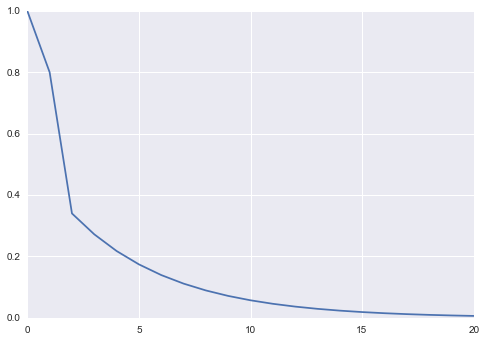

In [15]:
pure = PureARMA([0.8], [0,-0.3])
pure.plot_impulse_response()

In [23]:
row = [1,2,3]
np.matrix([row,row[-1:] + row[:-1],row[-2:] + row[:-2]])

matrix([[1, 2, 3],
        [3, 1, 2],
        [2, 3, 1]])

In [37]:
np.matrix([row,row[-1:] + row[:-1],row[-2:] + row[:-2]]) * ar.T

matrix([[14],
        [11],
        [11]])

In [35]:
ar = np.matrix([1,2,3])

In [39]:
2 * ar

matrix([[2, 4, 6]])